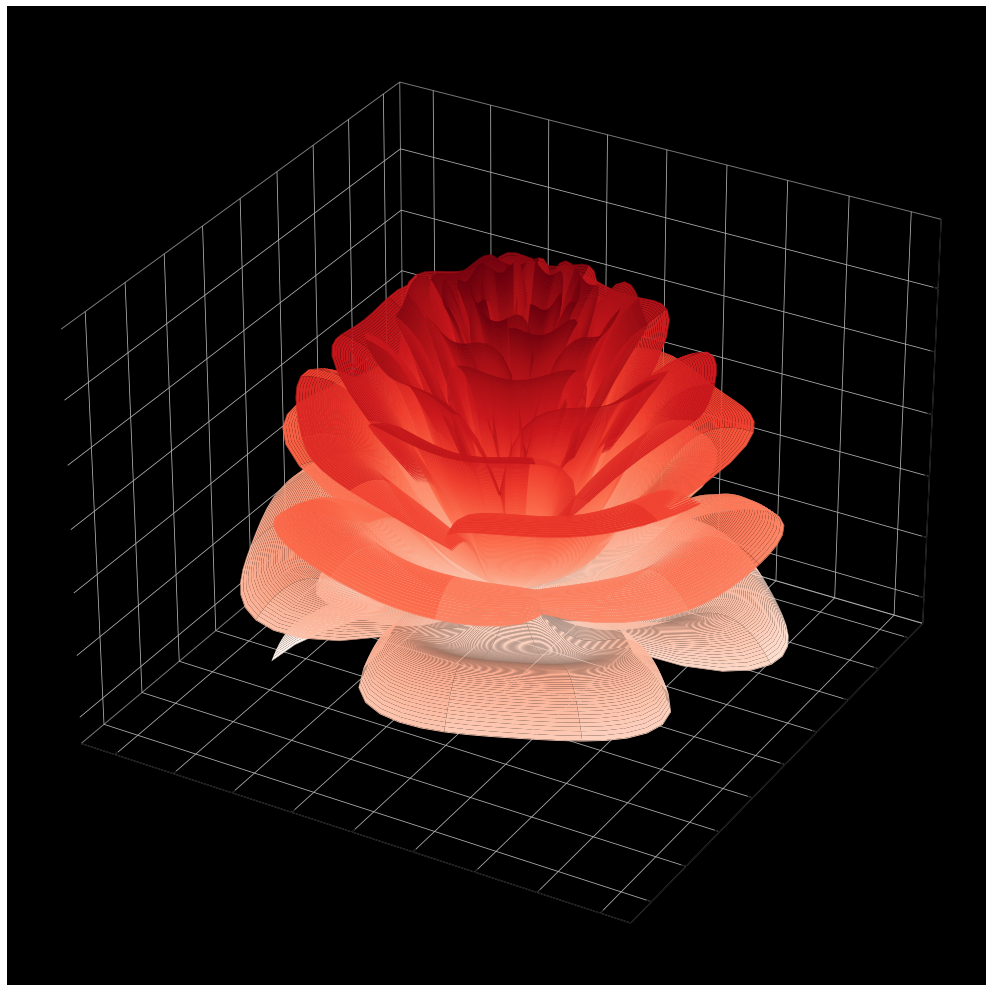

In [14]:
import mpl_toolkits as mp3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import math

# Número de puntos a lo largo del radio y el ángulo theta
n = 800

# Coeficientes para la ecuación paramétrica de la flor
A = 1.995653
B = 1.27689
C = 8

# Definición de los valores para el radio y el ángulo theta
r = np.linspace(0, 1, n)
theta = np.linspace(-2, 20*math.pi, n)

# Crear una malla para el radio y el ángulo theta
[R, THETA] = np.meshgrid(r, theta)

# Parámetro que controla la forma de los pétalos
petalNum = 3.6

# Ecuaciones paramétricas para las coordenadas x, y, z
x = 1 - (1/2)*((5/4)*(1 - np.mod(petalNum*THETA, 2*math.pi) / math.pi)**2 - 1/4)**2
phi = (math.pi/2)*np.exp(-THETA / (C*math.pi))
y = A*(R**2)*((B*R - 1)**2)*np.sin(phi)
R2 = x*(R*np.sin(phi) + y*np.cos(phi))
X = R2*np.sin(THETA)
Y = R2*np.cos(THETA)
Z = x*(R*np.cos(phi) - y*np.sin(phi))

# Crear una figura y un subplot en 3D
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Crear la superficie de la flor en 3D
ax.plot_surface(X, Y, Z, rstride=6, cstride=6, cmap='Reds', antialiased=True, alpha=1)

# Mostrar la figura
plt.show()

In [15]:
# Definir la función de animación
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=20,
                               blit=True)

# Guardar la animación
anim.save('3D_rose.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())